In [21]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# 性能評価
from sklearn import metrics

import statsmodels.api as sm

In [23]:
# ロジスティック関数
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t))

In [24]:
t = np.linspace(-6, 6, 500)
y = np.array([logistic(ele) for ele in t])

Text(0.5,1,'Logistic Function')

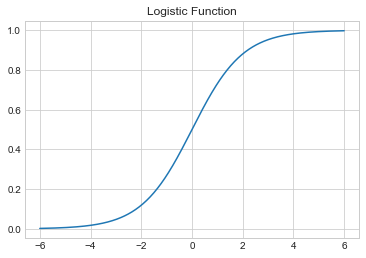

In [25]:
plt.plot(t, y)
plt.title('Logistic Function')

In [26]:
df = sm.datasets.fair.load_pandas().data

In [27]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


affairsが0なら不倫していない、1なら不倫しているということにする

In [28]:
def affairs_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [29]:
df['Had_affairs'] = df['affairs'].apply(affairs_check)

In [30]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [31]:
# lambdaの練習
df['Test_affairs'] = df['affairs'].apply(lambda x: 1 if x != 0 else 0)

In [32]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affairs,Test_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,1


In [34]:
# Test_affairs列削除
del df['Test_affairs']

In [35]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [36]:
df.groupby('Had_affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


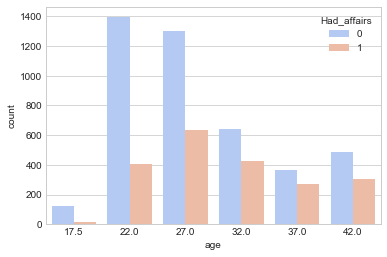

In [42]:
# 年齢でカウント
sns.countplot('age', data=df.sort_values('age'), hue='Had_affairs', palette='coolwarm')

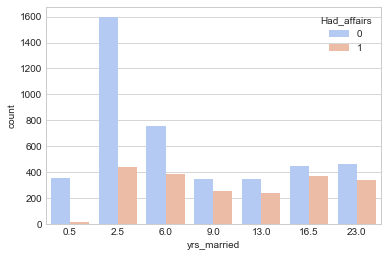

In [43]:
# 結婚している年月でカウント
sns.countplot('yrs_married', data=df.sort_values('yrs_married'), hue='Had_affairs', palette='coolwarm')

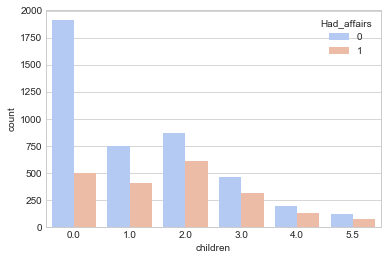

In [44]:
# 子供の数
sns.countplot('children', data=df.sort_values('children'), hue='Had_affairs', palette='coolwarm')

### データの前処理

In [47]:
occ_dummies = pd.get_dummies(df.occupation)
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [48]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [50]:
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [51]:
# 不要な説明変数の削除
X = df.drop(['occupation', 'occupation_husb', 'Had_affairs'], axis=1)

In [52]:
# ダミー変数をconcat
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [53]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [54]:
X = pd.concat([X, dummies], axis=1)

In [55]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [56]:
# 目的変数をYに格納
Y = df.Had_affairs

In [59]:
Y.sample(10)

483     1
2185    0
3222    0
1783    1
6255    0
4324    0
3687    0
2461    0
5977    0
512     1
Name: Had_affairs, dtype: int64

### 多重共線性

In [60]:
X = X.drop(['occ1', 'occ1', 'affairs'], axis=1)

In [61]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,0,1,0,0


In [68]:
# Yを一次元のarrayにする
Y = np.ravel(Y)

In [69]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [70]:
log_model = LogisticRegression()

In [71]:
# モデル作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
log_model.score(X, Y)

0.7260446120012567

In [77]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [80]:
coeff_df.sort_values(1, ascending=False)

,0,1
9,occ5,0.938206
10,occ6,0.916749
7,occ3,0.602956
13,hocc3,0.543536
12,hocc2,0.439485
16,hocc6,0.434298
15,hocc5,0.433445
14,hocc4,0.409587
8,occ4,0.343325
6,occ2,0.29282


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [82]:
log_model2 = LogisticRegression()

In [83]:
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
class_predict = log_model2.predict(X_test)

In [85]:
class_predict

array([0, 1, 1, ..., 0, 0, 0])

In [86]:
metrics.accuracy_score(Y_test, class_predict)

0.7160804020100503